## Read signal

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import ramanpy as rpy
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
spectra2 = rpy.Spectra()
to_predict = rpy.readFile("measurements/Ramandata_tablets.MAT", spectra2, True)
spectra2_copy = spectra2.copy()

+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
| active (% w/w) | Type | 3600.000 | 3599.000 | 3598.000 | ... | 204.0000 | 203.0000 | 202.0000 | 201.0000 | 200.0000 |
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
Beginning of importing frequency: 3600.000
End of importing frequency: 200.0000
Name of column containing the to-predict values: active (% w/w)


## Remove baseline with different automatic algorithms based on least square fitting

### Least Square Fitting (Eiliers and Boelens, 2005)

--- 417.582111120224 seconds ---


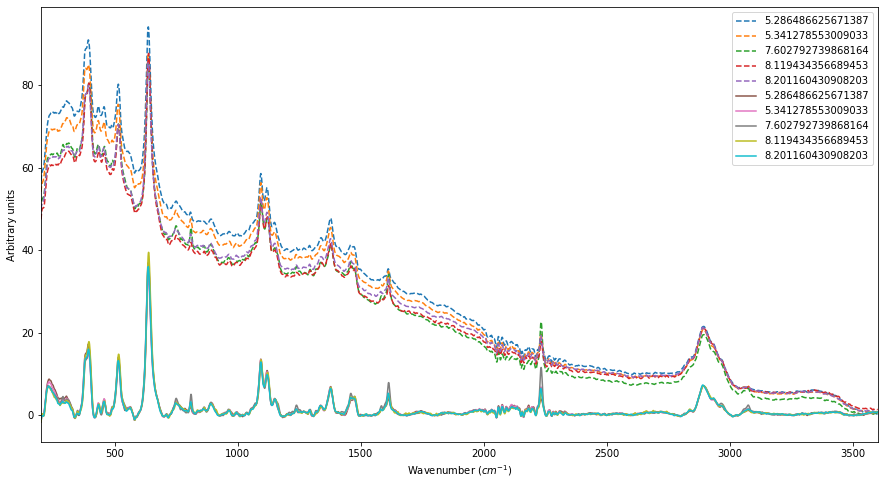

In [2]:
spectra2 = spectra2_copy.copy()
plt.figure(figsize=(15,8))
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], "--", label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], "--", label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], "--", label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], "--", label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], "--", label=to_predict[90])
axes = plt.gca()
axes.set_xlim([200,3601])
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Arbitrary units")

# Pre-processing
start_time = time.time()
ROI = np.array([[200, 300], [700, 1000], [1600, 2000], [2250, 2700], [3100, 3600]])
spectra2.removeBaseline(roi=ROI, method="als", inPlace=True, **{"niter": 500})
print("--- %s seconds ---" % (time.time() - start_time))
spectra2.smoothSignal()

plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], label=to_predict[90])
plt.legend()
plt.show()

CV metrics: 
RMSECV = 0.11 
R2 = 0.99

Test metrics: 
RMSEP = 0.43 
R2 = 0.78


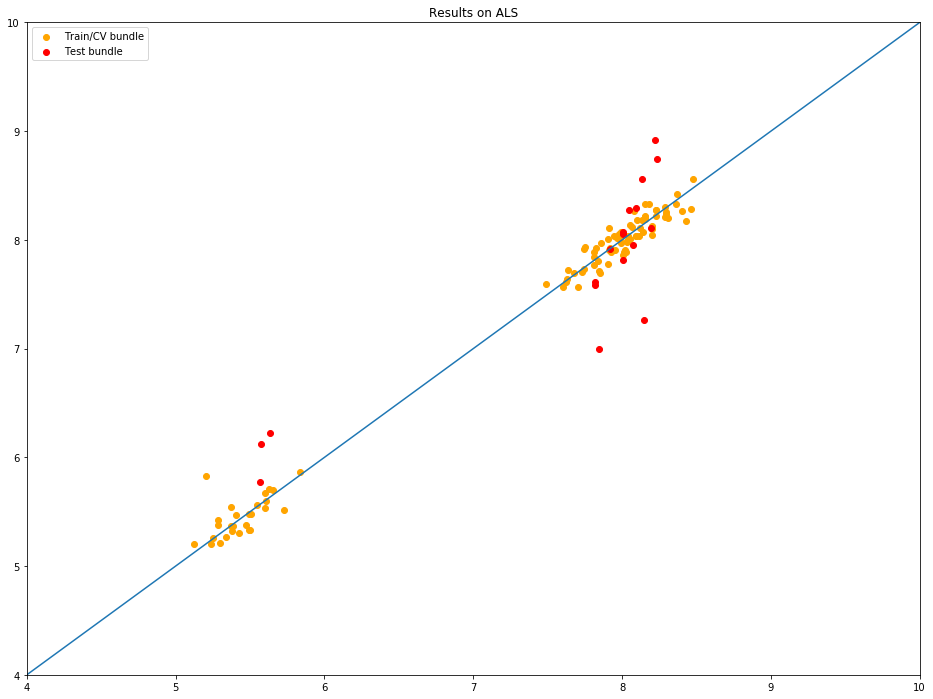

In [3]:
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on ALS")
plt.show()

### Asymmetrically Reweighted Penalized Least Square Fitting (Baek et al., 2015)

--- 82.49978613853455 seconds ---


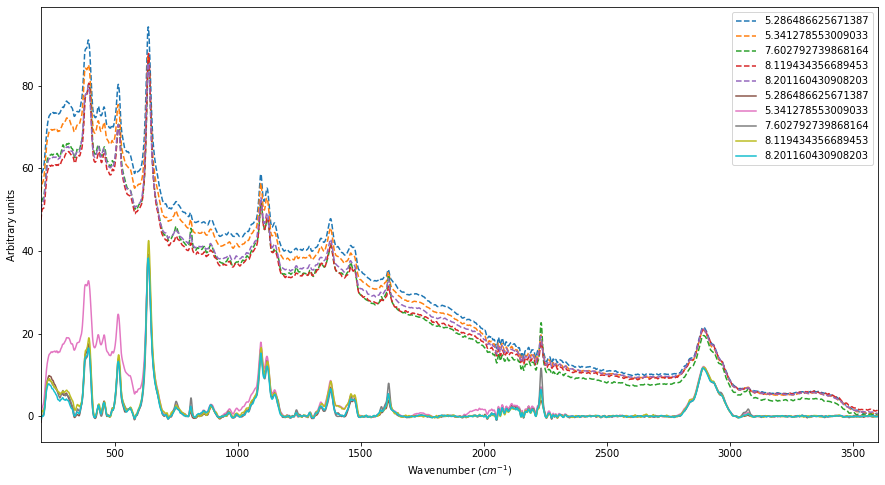

In [8]:
spectra2 = spectra2_copy.copy()
plt.figure(figsize=(15,8))
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], "--", label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], "--", label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], "--", label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], "--", label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], "--", label=to_predict[90])
axes = plt.gca()
axes.set_xlim([200,3601])
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Arbitrary units")

# Pre-processing
start_time = time.time()
ROI = np.array([[200, 300], [700, 1000], [1600, 2000], [2250, 2700], [3100, 3600]])
spectra2.removeBaseline(roi=ROI, method="arPLS", inPlace=True, **{"ratio": 1e-3})
print("--- %s seconds ---" % (time.time() - start_time))
spectra2.smoothSignal()

plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], label=to_predict[90])
plt.legend()
plt.show()

CV metrics: 
RMSECV = 0.47 
R2 = 0.84

Test metrics: 
RMSEP = 0.5 
R2 = 0.7


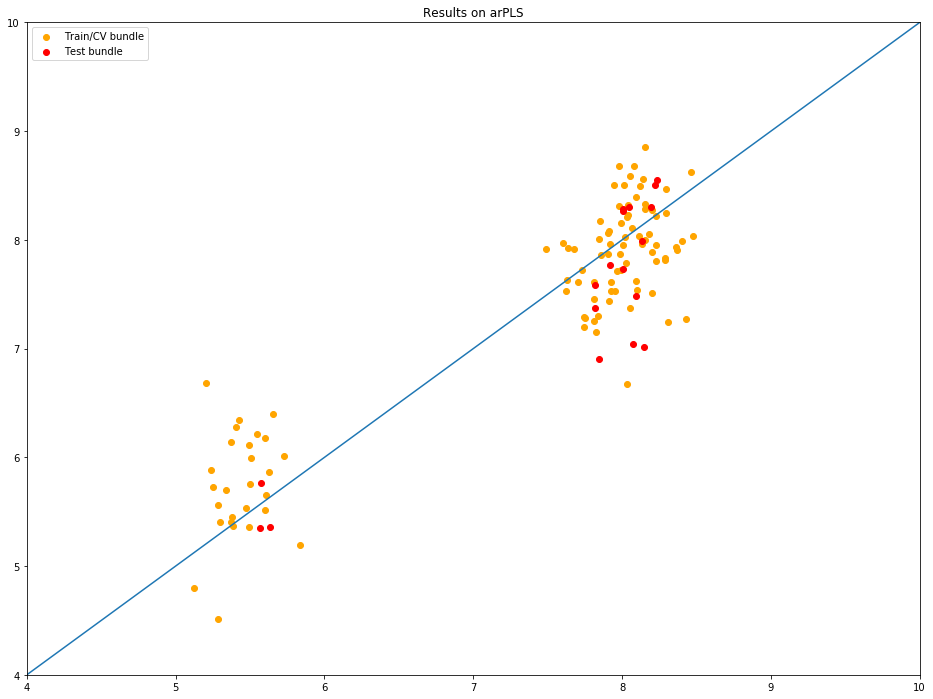

In [9]:
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on arPLS")
plt.show()

### Doubly Reweighted Penalized Least Square Fitting (Xu et al., 2019)

--- 16.443801403045654 seconds ---


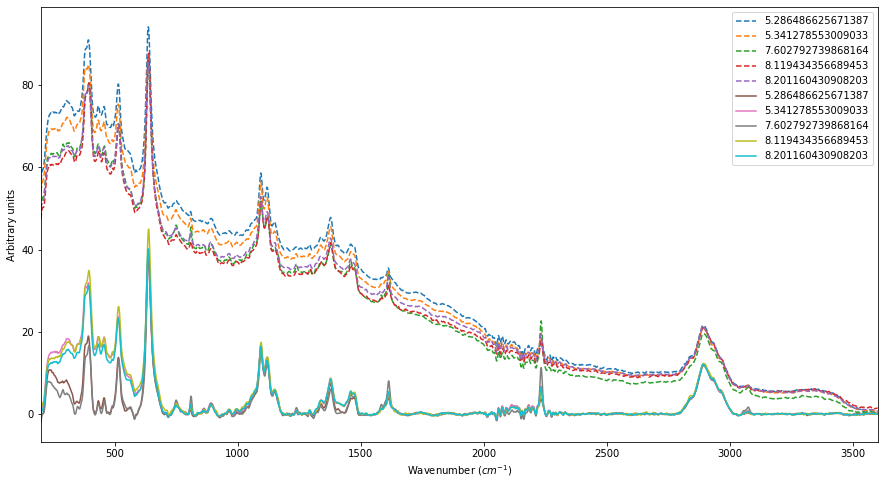

In [6]:
spectra2 = spectra2_copy.copy()
plt.figure(figsize=(15,8))
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], "--", label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], "--", label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], "--", label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], "--", label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], "--", label=to_predict[90])
axes = plt.gca()
axes.set_xlim([200,3601])
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Arbitrary units")

# Pre-processing
start_time = time.time()
ROI = np.array([[200, 300], [700, 1000], [1600, 2000], [2250, 2700], [3100, 3600]])
spectra2.removeBaseline(roi=ROI, method="drPLS", inPlace=True, **{"ratio": 1e-4, "niter": 500})
print("--- %s seconds ---" % (time.time() - start_time))
spectra2.smoothSignal()

plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], label=to_predict[90])
plt.legend()
plt.show()

CV metrics: 
RMSECV = 0.38 
R2 = 0.89

Test metrics: 
RMSEP = 0.43 
R2 = 0.78


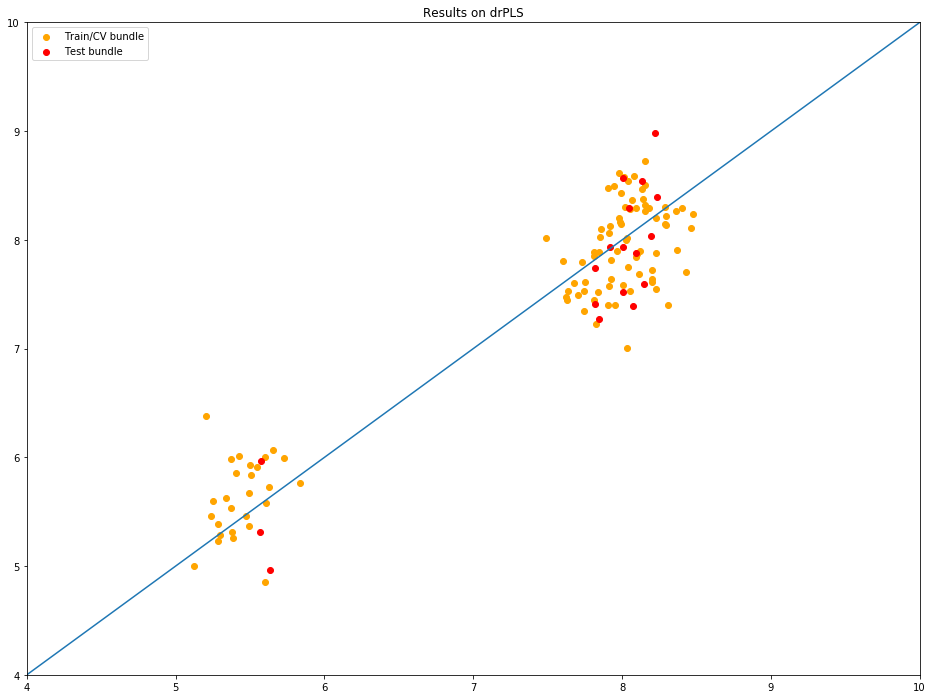

In [7]:
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on drPLS")
plt.show()

### Raw signal

CV metrics: 
RMSECV = 0.23 
R2 = 0.96

Test metrics: 
RMSEP = 0.31 
R2 = 0.89


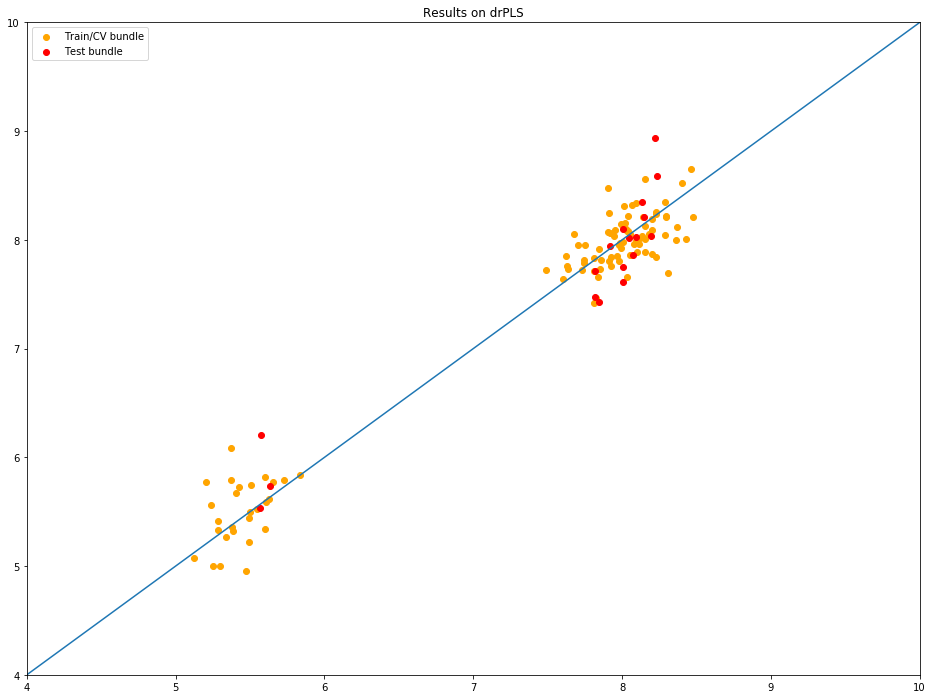

In [5]:
spectra2 = spectra2_copy.copy()
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on drPLS")
plt.show()

In [12]:
caca = 1 if False else 2
print(caca)

2
